### 1. Install and load packages


In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import datetime,date
import demoji
import emoji
demoji.download_codes()
import string
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from io import StringIO

... OK (Got response in 0.58 seconds)
Writing emoji data to C:\Users\kbyc\.demoji\codes.json ...
... OK


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from textblob import TextBlob
import sys
import os

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models

In [5]:
#!pip install textblob

In [6]:
#pip install pyspellchecker


In [7]:
#pip install emoji

### 2. Load data
    Add the missing days from 

In [8]:
df_17 = pd.read_csv('BTC_2017_NEW')
df_18 = pd.read_csv('BTC_2018_NEW')
df_19 = pd.read_csv('BTC_2019_v2')
df_20_07 = pd.read_csv('BTC_2020_07')
df_20 = pd.read_csv('BTC_2020_v2')


In [9]:
df_list = [df_20, df_20_07, df_19, df_18, df_17]

In [10]:
print(df_list)

[        Unnamed: 0  Unnamed: 0.1  \
0                0             0   
1                1             1   
2                2             2   
3                3             3   
4                4             4   
...            ...           ...   
998343      998343        998343   
998344      998344        998344   
998345      998345        998345   
998346      998346        998346   
998347      998347        998347   

                                                      url  \
0       https://twitter.com/bitcoinpanda69/status/1407...   
1       https://twitter.com/cryptolosophy/status/14078...   
2       https://twitter.com/tantonomini/status/1407850...   
3       https://twitter.com/Anthony04092882/status/140...   
4       https://twitter.com/tantonomini/status/1407850...   
...                                                   ...   
998343  https://twitter.com/SatoshiFlipper/status/1280...   
998344  https://twitter.com/BITCOIN_FEG/status/1280290...   
998345  https://t

[386456 rows x 28 columns]]


### 3. Merge data

In [11]:
df_btc = pd.concat(df_list)

In [12]:
df_btc.reset_index(drop=True, inplace=True)

In [13]:
print(df_btc)

         Unnamed: 0  Unnamed: 0.1  \
0                 0           0.0   
1                 1           1.0   
2                 2           2.0   
3                 3           3.0   
4                 4           4.0   
...             ...           ...   
2197134      386451           NaN   
2197135      386452           NaN   
2197136      386453           NaN   
2197137      386454           NaN   
2197138      386455           NaN   

                                                       url  \
0        https://twitter.com/bitcoinpanda69/status/1407...   
1        https://twitter.com/cryptolosophy/status/14078...   
2        https://twitter.com/tantonomini/status/1407850...   
3        https://twitter.com/Anthony04092882/status/140...   
4        https://twitter.com/tantonomini/status/1407850...   
...                                                    ...   
2197134  https://twitter.com/technology/status/87841412...   
2197135  https://twitter.com/ArtByteMe/status/878413276... 

[2197139 rows x 29 columns]


### 4. Remove unnecessary columns

In [14]:
#Remove unnecessary columns
df_col = df_btc[['date', 'content', 'retweetCount', 'likeCount']]
print(df_col)

                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  retweetCount  \
0        fooo isn't underwater\n\nfooo's entire net wor...             1   
1        Jejudoge CMC listing is Live! Currently Voted ...            10   
2        When people say “bitcoin is MySpace, something...             6   
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...             6   
4        HEX, BTC, ETH annual charts. B and E might be ...             2   
...                                                    ...           ...   
2197134  Bi

In [15]:
#Filter out the tweets that are below our threshold of relevance
df_1 = df_col[(df_col['retweetCount'] > 0) | (df_col['likeCount'] > 4)]
print(df_1)


                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  retweetCount  \
0        fooo isn't underwater\n\nfooo's entire net wor...             1   
1        Jejudoge CMC listing is Live! Currently Voted ...            10   
2        When people say “bitcoin is MySpace, something...             6   
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...             6   
4        HEX, BTC, ETH annual charts. B and E might be ...             2   
...                                                    ...           ...   
2197134  Bi

In [16]:
df_1.dtypes

date            object
content         object
retweetCount     int64
likeCount        int64
dtype: object

In [17]:
#Remove the last 2 columns
df_col2 = df_1[['date', 'content']]
print(df_col2)


                              date  \
0        2021-06-23 23:59:57+00:00   
1        2021-06-23 23:59:09+00:00   
2        2021-06-23 23:59:08+00:00   
3        2021-06-23 23:58:21+00:00   
4        2021-06-23 23:57:28+00:00   
...                            ...   
2197134  2017-06-24 00:47:02+00:00   
2197135  2017-06-24 00:43:39+00:00   
2197136  2017-06-24 00:41:17+00:00   
2197137  2017-06-24 00:36:48+00:00   
2197138  2017-06-24 00:25:51+00:00   

                                                   content  
0        fooo isn't underwater\n\nfooo's entire net wor...  
1        Jejudoge CMC listing is Live! Currently Voted ...  
2        When people say “bitcoin is MySpace, something...  
3        @CryptoGodJohn #BTC Bullish &amp; @CentricRise...  
4        HEX, BTC, ETH annual charts. B and E might be ...  
...                                                    ...  
2197134  Bitcoin startup Blockchain raises $40 million ...  
2197135  ArtByte digital currency supports #artists aro

In [18]:
df_col3 = pd.to_datetime(df_col2['date']).dt.date
print(df_col3)


0          2021-06-23
1          2021-06-23
2          2021-06-23
3          2021-06-23
4          2021-06-23
              ...    
2197134    2017-06-24
2197135    2017-06-24
2197136    2017-06-24
2197137    2017-06-24
2197138    2017-06-24
Name: date, Length: 2195405, dtype: object


In [19]:
df_col2['Date'] = df_col3

df_2 = df_col2[['Date', 'content']]
print(df_2)


<ipython-input-19-5c8cbc12c59c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col2['Date'] = df_col3


               Date                                            content
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2197134  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2197135  2017-06-24  ArtByte digital currency supports #artists aro...
2197136  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2197137  2017-06-24  Currently: One bitcoin could feed me ground be...
2197138  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [20]:
df_2.reset_index(drop=True, inplace=True)

In [21]:
print(df_2)

               Date                                            content
0        2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1        2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2        2021-06-23  When people say “bitcoin is MySpace, something...
3        2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4        2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...             ...                                                ...
2195400  2017-06-24  Bitcoin startup Blockchain raises $40 million ...
2195401  2017-06-24  ArtByte digital currency supports #artists aro...
2195402  2017-06-24  What if the bitcoin bubble bursts? https://t.c...
2195403  2017-06-24  Currently: One bitcoin could feed me ground be...
2195404  2017-06-24  "If you don't eat yer meat, you can't have any...

[2195405 rows x 2 columns]


In [22]:
#df_2.to_csv('BTC_2')

In [23]:
df_2['Date'].dtypes

dtype('O')

### From dataset of 4 years take a sample only 2 months - May& June 2021

In [24]:
df_2['Date'] = pd.to_datetime(df_2['Date'])

<ipython-input-24-f351f596dcd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'])


In [25]:
df_2.dtypes

Date       datetime64[ns]
content            object
dtype: object

In [26]:
df_final = df_2[(df_2['Date'] > '2021-04-30') & (df_2['Date'] <= '2021-06-30') ]

In [27]:
print(df_final)

             Date                                            content
0      2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1      2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2      2021-06-23  When people say “bitcoin is MySpace, something...
3      2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4      2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...           ...                                                ...
241031 2021-05-01  What speeds do you like for transactions?\n\n#...
241032 2021-05-01  #Bitcoin May Day, Monthly closed ladies and ge...
241033 2021-05-01  Bitcoin hits 58k and now this??? https://t.co/...
241034 2021-05-01  Who’s got the moves? \nStrike Team got the MOV...
241035 2021-05-01  The price of #Bitcoin is now $57,635 USD\nThe ...

[241036 rows x 2 columns]


In [26]:
#df_2_example.to_csv('BTC_2_EXAMPLE')

### Remove Emoji

In [28]:
df_final = df_final.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [29]:
print(df_final.loc[28,'content'])


This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  https://t.co/7webUh9voX


### Remove URL

In [30]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_final["content_url"] = df_final["content"].apply(lambda text: remove_urls(text))

In [31]:
print(df_final.loc[28,'content'])

print(df_final.loc[28,'content_url'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  https://t.co/7webUh9voX
This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  


### Replace contractions with the full form

In [32]:
cList = {
  "ain’t": "am not",
  "aren’t": "are not",
  "can’t": "cannot",
  "can’t’ve": "cannot have",
  "’cause": "because",
  "could’ve": "could have",
  "couldn’t": "could not",
  "couldn’t’ve": "could not have",
  "didn’t": "did not",
  "doesn’t": "does not",
  "don’t": "do not",
  "hadn’t": "had not",
  "hadn’t’ve": "had not have",
  "hasn’t": "has not",
  "haven’t": "have not",
  "he’d": "he would",
  "he’d’ve": "he would have",
  "he’ll": "he will",
  "he’ll’ve": "he will have",
  "he’s": "he is",
  "how’d": "how did",
  "how’d’y": "how do you",
  "how’ll": "how will",
  "how’s": "how is",
  "i’d": "i would",
  "i’d’ve": "i would have",
  "i’ll": "i will",
  "i’ll’ve": "i will have",
  "i’m": "i am",
  "i’ve": "i have",
  "isn’t": "is not",
  "it’d": "it had",
  "it’d’ve": "it would have",
  "it’ll": "it will",
  "it’ll’ve": "it will have",
  "it’s": "it is",
  "let’s": "let us",
  "ma’am": "madam",
  "mayn’t": "may not",
  "might’ve": "might have",
  "mightn’t": "might not",
  "mightn’t’ve": "might not have",
  "must’ve": "must have",
  "mustn’t": "must not",
  "mustn’t’ve": "must not have",
  "needn’t": "need not",
  "needn’t’ve": "need not have",
  "o’clock": "of the clock",
  "oughtn’t": "ought not",
  "oughtn’t’ve": "ought not have",
  "shan’t": "shall not",
  "sha’n’t": "shall not",
  "shan’t’ve": "shall not have",
  "she’d": "she would",
  "she’d’ve": "she would have",
  "she’ll": "she will",
  "she’ll’ve": "she will have",
  "she’s": "she is",
  "should’ve": "should have",
  "shouldn’t": "should not",
  "shouldn’t’ve": "should not have",
  "so’ve": "so have",
  "so’s": "so is",
  "that’d": "that would",
  "that’d’ve": "that would have",
  "that’s": "that is",
  "there’d": "there had",
  "there’d’ve": "there would have",
  "there’s": "there is",
  "they’d": "they would",
  "they’d’ve": "they would have",
  "they’ll": "they will",
  "they’ll’ve": "they will have",
  "they’re": "they are",
  "they’ve": "they have",
  "to’ve": "to have",
  "wasn’t": "was not",
  "we’d": "we had",
  "we’d’ve": "we would have",
  "we’ll": "we will",
  "we’ll’ve": "we will have",
  "we’re": "we are",
  "we’ve": "we have",
  "weren’t": "were not",
  "what’ll": "what will",
  "what’ll've": "what will have",
  "what’re": "what are",
  "what’s": "what is",
  "what’ve": "what have",
  "when’s": "when is",
  "when’ve": "when have",
  "where’d": "where did",
  "where’s": "where is",
  "where’ve": "where have",
  "who’ll": "who will",
  "who’ll've": "who will have",
  "who’s": "who is",
  "who’ve": "who have",
  "why’s": "why is",
  "why’ve": "why have",
  "will’ve": "will have",
  "won’t": "will not",
  "won’t've": "will not have",
  "would’ve": "would have",
  "wouldn’t": "would not",
  "wouldn’t've": "would not have",
  "y’all": "you all",
  "y’alls": "you alls",
  "y’all’d": "you all would",
  "y’all’d’ve": "you all would have",
  "y’all’re": "you all are",
  "y’all’ve": "you all have",
  "you’d": "you had",
  "you’d’ve": "you would have",
  "you’ll": "you you will",
  "you’ll’ve": "you you will have",
  "you’re": "you are",
  "you’ve": "you have",
    "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [33]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
 
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())
 
df_final['content_contr'] = df_final['content_url'].apply(lambda text: expandContractions(text))
 

In [34]:
print(df_final.loc[0,'content_url'])

print(df_final.loc[0,'content_contr'])

fooo isn't underwater

fooo's entire net worth is up 450x from March 2020 still

fooo hasn't been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy 
fooo is not underwater

fooo's entire net worth is up 450x from march 2020 still

fooo has not been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy 


In [35]:
# remove special characters, numbers and punctuations
df_final['content_clean'] = df_final['content_contr'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-35-3ea86378f6eb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['content_clean'] = df_final['content_contr'].str.replace("[^a-zA-Z#]", " ")


In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
stop_words = set(stopwords.words('english'))


In [38]:
def preprocess_tweet_text(tweet):

    #convert to lowercase
    tweet = tweet.lower()
    
    #remove any urls
    #tweet = re.sub(r"https\S+|www\S+|https\S+","", tweet, flags=re.MULTILINE)
    
    #remove punctuations
    tweet = tweet.translate(str.maketrans(" ", " ", string.punctuation))
    
    #remove user @ refreneces and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', "", tweet)
    
    # remove special characters, numbers and punctuations
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    
    #remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    #lemmatizing 
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)



In [39]:
df_final["content_clean_2"] = df_final["content_clean"].apply(lambda tweet: preprocess_tweet_text(tweet))

In [40]:
print(df_final.loc[28,'content'])

print(df_final.loc[28,'content_clean_2'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  https://t.co/7webUh9voX
daily close could one ages funding still negative btc amp eth question fire winter coming


In [41]:
#df_final.to_csv('BTC_FINAL')

### Remove words related to BITCOIN

In [42]:
# Remove the words: btc, BTC, Bitcoin, bitcoin etc.
remove_words = ['btc','bitcoin', 'xrp', 'eth', 'ethereum', 'cryptocurrencies', 'cryptocurrency', 'crypto', 'bnb', 'binance', 'amp', 'doge','dogecoin', 'ada', 'cardano', 'xrp', 'usdt', 'tether', 'usdc', 'usd coin', 'dot', 'polkadot', 'busd', 'uniswap', 'uni', 'shib', 'shiba inu', 'nft', 'nfts', 'gt', 'ltc', 'litecoin', 'sol', 'solana', 'coin', 'usd', 'blockchain', 'gon', 'na', 'wan']
 
pat = '|'.join([r'\b{}\b'.format(w) for w in remove_words])
df_final['content_clean_3'] = df_final['content_clean_2'].str.replace(pat, '')


<ipython-input-42-16820c4f0faf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['content_clean_3'] = df_final['content_clean_2'].str.replace(pat, '')


### Remove single letters

In [43]:
df_final['content_single'] = df_final['content_clean_3'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

<ipython-input-43-743cbf8c4558>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['content_single'] = df_final['content_clean_3'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


### Importing packages

In [44]:
import pyLDAvis.gensim_models as gensimvis


In [45]:
import pyLDAvis.gensim_models

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
import json
%matplotlib inline

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\kbyc\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\kbyc\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [47]:
# Extract only clean text
clean_tweets = pd.DataFrame(df_final.content_single)

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
print(clean_tweets)

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                           content_single
0       fooo underwater fooo entire net worth march st...
1       jejudoge cmc listing live currently voted comm...
2       people say myspace something come facebook the...
3       cryptogodjohn bullish centricrise bullish cnr ...
4       hex annual charts might sign whats come since ...
...                                                   ...
241031                  speeds like transactions bch nano
241032            may day monthly closed ladies gentlemen
241033                                              hits 
241034  whos got moves strike team got moves rd icoffe...
241035                    price price price monero price 

[241036 rows x 1 columns]


In [49]:
clean_tweets.head()

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content_single
0,fooo underwater fooo entire net worth march st...
1,jejudoge cmc listing live currently voted comm...
2,people say myspace something come facebook the...
3,cryptogodjohn bullish centricrise bullish cnr ...
4,hex annual charts might sign whats come since ...


#### Bigrams

In [50]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in clean_tweets.content_single])
# Filter only those that occur at least 50 times
finder.apply_freq_filter(20)
bigram_scores = finder.score_ngrams(bigram_measures.raw_freq)

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
bigram_freq = pd.DataFrame(bigram_scores)
bigram_freq.columns = ['bigram', 'raw_freq']
bigram_freq.sort_values(by='raw_freq', axis = 0, ascending = False, inplace = True)

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

C:\Users\kbyc\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print(bigram_freq)

                            bigram  raw_freq
0                   (el, salvador)  0.001746
1                     (elon, musk)  0.001062
2                  (legal, tender)  0.000850
3                (michael, saylor)  0.000782
4                        (let, us)  0.000743
...                            ...       ...
9612                     (go, new)  0.000006
9613                  (go, people)  0.000006
9614                   (go, price)  0.000006
9615                   (go, right)  0.000006
10082  (zilliqacommunity, zilliqa)  0.000006

[10083 rows x 2 columns]


In [289]:
bigram_freq[:10]

,bigram,raw_freq
0,"(el, salvador)",0.001746
1,"(elon, musk)",0.001062
2,"(legal, tender)",0.000850
3,"(michael, saylor)",0.000782
4,"(let, us)",0.000743
5,"(long, term)",0.000570
6,"(market, cap)",0.000464
7,"(looks, like)",0.000441
8,"(bull, market)",0.000381
9,"(bear, market)",0.000359


In [55]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_freq[bigram_freq.apply(lambda bigram: bigram.raw_freq > 0, axis = 1)][:100]

In [288]:
filtered_bigram[:10]

,bigram,raw_freq
0,"(el, salvador)",0.001746
1,"(elon, musk)",0.001062
2,"(legal, tender)",0.000850
3,"(michael, saylor)",0.000782
4,"(let, us)",0.000743
5,"(long, term)",0.000570
6,"(market, cap)",0.000464
7,"(looks, like)",0.000441
8,"(bull, market)",0.000381
9,"(bear, market)",0.000359


In [57]:
bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]

In [287]:
# examples of bigrams
bigrams[:10]

['el salvador',
 'elon musk',
 'legal tender',
 'michael saylor',
 'let us',
 'long term',
 'market cap',
 'looks like',
 'bull market',
 'bear market']

In [286]:
print(bigrams)

['el salvador', 'elon musk', 'legal tender', 'michael saylor', 'let us', 'long term', 'market cap', 'looks like', 'bull market', 'bear market', 'short term', 'store value', 'buy dip', 'years ago', 'first time', 'bull run', 'good morning', 'price action', 'last week', 'join us', 'energy consumption', 'unknown wallet', 'renewable energy', 'top bullish', 'bullish trend', 'first country', 'next week', 'central bank', 'kucoin top', 'trend pair', 'death cross', 'time high', 'many people', 'lightning network', 'would like', 'laser eyes', 'last year', 'nic carter', 'like retweet', 'pizza day', 'may th', 'seems like', 'balance sheet', 'one day', 'financial advice', 'make sure', 'smart contracts', 'every time', 'coming soon', 'proof work', 'new ath', 'dont know', 'central banks', 'make legal', 'dogefam dogehouse', 'look like', 'make money', 'use case', 'good news', 'energy usage', 'via youtube', 'digital currency', 'last days', 'last time', 'fold app', 'time buy', 'us see', 'buy sell', 'buying d

In [59]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [60]:
tweets_w_ngrams = clean_tweets.copy()

In [61]:
print(tweets_w_ngrams)

                                           content_single
0       fooo underwater fooo entire net worth march st...
1       jejudoge cmc listing live currently voted comm...
2       people say myspace something come facebook the...
3       cryptogodjohn bullish centricrise bullish cnr ...
4       hex annual charts might sign whats come since ...
...                                                   ...
241031                  speeds like transactions bch nano
241032            may day monthly closed ladies gentlemen
241033                                              hits 
241034  whos got moves strike team got moves rd icoffe...
241035                    price price price monero price 

[241036 rows x 1 columns]


In [62]:
tweets_w_ngrams.content_single = tweets_w_ngrams.content_single.map(lambda x: replace_ngram(x))

In [63]:
# tokenize tweets 
tweets_w_ngrams = tweets_w_ngrams.content_single.map(lambda x: [word for word in x.split()])

In [64]:
tweets_w_ngrams.head()

0    [fooo, underwater, fooo, entire, net, worth, m...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [people, say, myspace, something, come, facebo...
3    [cryptogodjohn, bullish, centricrise, bullish,...
4    [hex, annual, charts, might, sign, whats, come...
Name: content_single, dtype: object

In [65]:
for i in range (len(tweets_w_ngrams)):
    tweets_w_ngrams[i] = " ".join(tweets_w_ngrams[i])
    
df_final['final_tweets'] = tweets_w_ngrams

In [66]:
print(df_final.loc[0,'content_single'])

print(df_final.loc[0,'final_tweets'])

fooo underwater fooo entire net worth march still fooo underwater anything years trading spot vs pair literally hodling without leverage game becomes vomitously easy
fooo underwater fooo entire net worth march still fooo underwater anything years trading spot vs pair literally hodling without leverage game becomes vomitously easy


### Get the most frequent words

In [68]:
from collections import Counter
cnt = Counter()
for text in df_final["final_tweets"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(15)


[('like', 14584),
 ('people', 13477),
 ('one', 12927),
 ('get', 12298),
 ('buy', 12298),
 ('time', 11114),
 ('good', 10972),
 ('price', 10815),
 ('market', 9890),
 ('new', 9854),
 ('would', 9749),
 ('money', 9624),
 ('going', 9544),
 ('see', 9397),
 ('still', 9060)]

### Remove the most frequent words

In [69]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(15)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
 
df_final["content_freq"] = df_final["final_tweets"].apply(lambda text: remove_freqwords(text))


In [70]:
print(df_final.loc[100,'content'])

print(df_final.loc[100,'content_freq'])

@FinancialTimes Anyone who can have there bitcoin taken from them has not done enough research in how to properly secure it.   Leaving it on exchange is like leaving $s in a bank, it can be confiscated at any time.   Secure your keys and there is nothing that can be done to take them from you.
financialtimes anyone taken done enough research properly secure leaving exchange leaving bank confiscated secure keys nothing done take


In [70]:
#df_final.to_csv('BTC_TOPIC.csv')

In [105]:
'''may_21 = df_final[(df_final['Date'] >= '2021-05-01') & (df_final['Date'] < '2021-06-01')]
#may_21 = may_21[['Date','content_freq']]
may_21.reset_index(drop=True, inplace=True)
'''

In [71]:
'''june_21 = df_final[(df_final['Date'] >= '2021-06-01') & (df_final['Date'] < '2021-07-01')]
june_21 = june_21[['Date','content_freq']]
june_21.reset_index(drop=True, inplace=True)
print(june_21)
'''

              Date                                       content_freq
0       2021-06-23  fooo underwater fooo entire net worth march fo...
1       2021-06-23  jejudoge cmc listing live currently voted comm...
2       2021-06-23  say myspace something come facebook theyre rig...
3       2021-06-23  cryptogodjohn bullish centricrise bullish cnr ...
4       2021-06-23  hex annual charts might sign whats come since ...
...            ...                                                ...
100587  2021-06-01                                                   
100588  2021-06-01  queef token youtube investment rt hold queef t...
100589  2021-06-01  transmira omniscape honored part sudanese gove...
100590  2021-06-01                want help accelerate global upgrade
100591  2021-06-01  close daily strong series lows last_days month...

[100592 rows x 2 columns]


In [189]:
june_21 = df_final[['Date','content_freq']]
june_21.head(5)

,Date,content_freq
0,2021-06-23,fooo underwater fooo entire net worth march fo...
1,2021-06-23,jejudoge cmc listing live currently voted comm...
2,2021-06-23,say myspace something come facebook theyre rig...
3,2021-06-23,cryptogodjohn bullish centricrise bullish cnr ...
4,2021-06-23,hex annual charts might sign whats come since ...


In [190]:
# Remove weird words
remove_words_2 = ['link','matic', 'vet', 'xlm', 'vra', 'low', 'back', 'chart', 'bullish', 'next', 'high', 'qnt','tel', 'eos', 'defi', 'bsc', 'hex', 'dogefam', 'dogefam_dogehouse', 'dogehouse', 'ripple', 'ray', 'shiba', 'dont', 'know', 'cryptoart']
 
pat2 = '|'.join([r'\b{}\b'.format(w) for w in remove_words_2])
june_21['content_freq'] = june_21['content_freq'].str.replace(pat2, '')


<ipython-input-190-bb4c1460e9c8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  june_21['content_freq'] = june_21['content_freq'].str.replace(pat2, '')
<ipython-input-190-bb4c1460e9c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_21['content_freq'] = june_21['content_freq'].str.replace(pat2, '')


In [191]:
june_21.head(10)

,Date,content_freq
0,2021-06-23,fooo underwater fooo entire net worth march fo...
1,2021-06-23,jejudoge cmc listing live currently voted comm...
2,2021-06-23,say myspace something come facebook theyre rig...
3,2021-06-23,cryptogodjohn centricrise cnr cns long_term ...
4,2021-06-23,annual charts might sign whats come since be...
5,2021-06-23,fun facts tell friends based sales million ip...
6,2021-06-23,inflation latter staking risk free way offset ...
7,2021-06-23,metx cross day close reversal tail bottom p...
8,2021-06-23,otc first bought jejudoge june_th exact today ...
9,2021-06-23,rip officialmcafee thank keeping us safe cyber...


### I'm not running this one

### June 21
#### LDA Model

In [146]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models

In [274]:
june_21_cut = june_21[(june_21['Date'] >= '2021-06-01') & (df_final['Date'] < '2021-07-01')]
june_21_cut = june_21_cut[['Date','content_freq']]
june_21_cut.reset_index(drop=True, inplace=True)
print(june_21_cut)

              Date                                       content_freq
0       2021-06-23  fooo underwater fooo entire net worth march fo...
1       2021-06-23  jejudoge cmc listing live currently voted comm...
2       2021-06-23  say myspace something come facebook theyre rig...
3       2021-06-23  cryptogodjohn  centricrise  cnr cns long_term ...
4       2021-06-23   annual charts might sign whats come since  be...
...            ...                                                ...
100587  2021-06-01                                                   
100588  2021-06-01  queef token youtube investment rt hold queef t...
100589  2021-06-01  transmira omniscape honored part sudanese gove...
100590  2021-06-01                want help accelerate global upgrade
100591  2021-06-01  close daily strong series  lows last_days mont...

[100592 rows x 2 columns]


In [294]:
june_21_cut[['Date', 'content']] = june_21_cut[['Date','content_freq']]
june_21_cut = june_21_cut[['Date', 'content']]

In [295]:
june_21_cut.head(10)

,Date,content
0,2021-06-23,fooo underwater fooo entire net worth march fo...
1,2021-06-23,jejudoge cmc listing live currently voted comm...
2,2021-06-23,say myspace something come facebook theyre rig...
3,2021-06-23,cryptogodjohn centricrise cnr cns long_term ...
4,2021-06-23,annual charts might sign whats come since be...
5,2021-06-23,fun facts tell friends based sales million ip...
6,2021-06-23,inflation latter staking risk free way offset ...
7,2021-06-23,metx cross day close reversal tail bottom p...
8,2021-06-23,otc first bought jejudoge june_th exact today ...
9,2021-06-23,rip officialmcafee thank keeping us safe cyber...


In [275]:
final_tweets = june_21_cut['content_freq'].apply(lambda x: x.split())

In [317]:
final_tweets.head(5)

0    [fooo, underwater, fooo, entire, net, worth, m...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [say, myspace, something, come, facebook, they...
3    [cryptogodjohn, centricrise, cnr, cns, long_te...
4    [annual, charts, might, sign, whats, come, sin...
Name: content_freq, dtype: object

In [277]:
# dictionary
dictionary1 = corpora.Dictionary(final_tweets)

In [278]:
# corpus
doc_term_matrix = [dictionary1.doc2bow(doc) for doc in final_tweets]

In [315]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(42, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1)],
 [(16, 1),
  (9

In [280]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=8, id2word = dictionary1, passes=30,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [316]:
# To show initial topics
ldamodel.show_topics(8, num_words=7)
ldamodel.show_topics()

[(0,
  '0.011*"nano" + 0.010*"sats" + 0.009*"twitter" + 0.008*"bch" + 0.007*"jack" + 0.007*"jeju" + 0.007*"triangle"'),
 (1,
  '0.010*"live" + 0.007*"follow" + 0.006*"join" + 0.006*"team" + 0.006*"win" + 0.006*"miami" + 0.005*"today"'),
 (2,
  '0.029*"el_salvador" + 0.010*"legal_tender" + 0.008*"country" + 0.008*"currency" + 0.006*"world" + 0.006*"president" + 0.006*"million"'),
 (3,
  '0.007*"support" + 0.007*"today" + 0.006*"daily" + 0.006*"may" + 0.006*"long" + 0.006*"looking" + 0.006*"profit"'),
 (4,
  '0.015*"mining" + 0.008*"energy" + 0.007*"china" + 0.007*"use" + 0.007*"network" + 0.006*"world" + 0.006*"power"'),
 (5,
  '0.009*"think" + 0.006*"conference" + 0.006*"go" + 0.006*"want" + 0.006*"never" + 0.005*"really" + 0.005*"much"'),
 (6,
  '0.008*"sec" + 0.008*"thebitcoinconf" + 0.008*"trading" + 0.007*"theta" + 0.007*"cake" + 0.006*"iota" + 0.006*"kucoin"'),
 (7,
  '0.015*"elon" + 0.015*"hodl" + 0.013*"elonmusk" + 0.012*"safemoon" + 0.008*"moon" + 0.007*"altcoin" + 0.006*"altco

In [282]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary1, mds = 'pcoa')
pyLDAvis.display(topic_data)

#### optimize # of k topics


In [168]:
# insert after doc_term_matrix

In [89]:
coherence = []
for k in range(2,11):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary1, passes=30,\
                   iterations=200, chunksize = 10000, eval_every = None, random_state=0)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_tweets,\
                                                     dictionary=dictionary1, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10


In [90]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

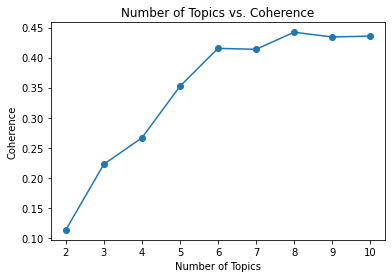

In [91]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [92]:
# Decide based on coherence plot
Lda = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda(doc_term_matrix, num_topics=6, id2word = dictionary1, passes=30,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [121]:
# To show initial topics
ldamodel2.show_topics(6, num_words=7, formatted=False)

[(0,
  [('bullish', 0.0119798295),
   ('chart', 0.0073500974),
   ('low', 0.0072633447),
   ('support', 0.006812021),
   ('daily', 0.0060014343),
   ('long', 0.0057930807),
   ('profit', 0.0053312355)]),
 (1,
  [('bsc', 0.013041931),
   ('matic', 0.00932285),
   ('safemoon', 0.007634685),
   ('follow', 0.00700612),
   ('token', 0.0062986272),
   ('cryptonews', 0.0059289555),
   ('hodl', 0.0057079825)]),
 (2,
  [('mining', 0.013736924),
   ('energy', 0.0084813675),
   ('china', 0.0068309046),
   ('million', 0.0059041632),
   ('network', 0.005797357),
   ('tesla', 0.0054897983),
   ('use', 0.0052046976)]),
 (3,
  [('dont', 0.005988084),
   ('want', 0.005363649),
   ('never', 0.0049556713),
   ('need', 0.0048268517),
   ('everyone', 0.0048258263),
   ('even', 0.004817068),
   ('much', 0.004703864)]),
 (4,
  [('miami', 0.011844273),
   ('thebitcoinconf', 0.0066355164),
   ('live', 0.0053624306),
   ('free', 0.0049087056),
   ('great', 0.004826598),
   ('community', 0.004692595),
   ('thank

In [99]:
topic_data_2 =  pyLDAvis.gensim_models.prepare(ldamodel2, doc_term_matrix, dictionary1, mds = 'pcoa')
pyLDAvis.display(topic_data)

### topic modeling 50 passes

In [122]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel_50 = Lda(doc_term_matrix, num_topics=8, id2word = dictionary1, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [123]:
# To show initial topics
ldamodel_50.show_topics(8, num_words=7, formatted=False)

[(0,
  [('bullish', 0.013082402),
   ('low', 0.008343688),
   ('chart', 0.007994781),
   ('support', 0.0075186635),
   ('daily', 0.0065779006),
   ('long', 0.0064980704),
   ('may', 0.0059513054)]),
 (1,
  [('jeju', 0.006849693),
   ('otc', 0.0064614494),
   ('amc', 0.0060365205),
   ('technical', 0.0053381887),
   ('ai', 0.0052039474),
   ('tsla', 0.004394187),
   ('spot', 0.0043938877)]),
 (2,
  [('mining', 0.019611938),
   ('energy', 0.012017336),
   ('china', 0.01023589),
   ('million', 0.009079646),
   ('tesla', 0.0075038737),
   ('miners', 0.006785505),
   ('supply', 0.005880802)]),
 (3,
  [('miami', 0.01095343),
   ('conference', 0.008753764),
   ('dont', 0.0076108132),
   ('everyone', 0.0063563534),
   ('elonmusk', 0.0057835253),
   ('im', 0.0057625985),
   ('elon', 0.0055936947)]),
 (4,
  [('value', 0.006986965),
   ('gold', 0.0062713423),
   ('way', 0.006021528),
   ('use', 0.0057710563),
   ('best', 0.0051255478),
   ('fiat', 0.004646485),
   ('real', 0.004501023)]),
 (5,
  

In [59]:
#tokenized_tweet = df_final['content_clean_3'].apply(lambda x: x.split())

In [60]:
#tokenized_tweet.head()


0    [fooo, underwater, fooo, entire, net, worth, x...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [say, myspace, something, gon, na, come, faceb...
3    [cryptogodjohn, bullish, centricrise, bullish,...
4    [hex, annual, charts, b, e, might, sign, whats...
Name: content_clean_3, dtype: object

### Cleaning for aspect based sentiment analysis

In [74]:
df_asp = df_final[['Date','content']]
df_asp.reset_index(drop=True, inplace=True)
print(df_asp)

              Date                                            content
0       2021-06-23  fooo isn't underwater\n\nfooo's entire net wor...
1       2021-06-23  Jejudoge CMC listing is Live! Currently Voted ...
2       2021-06-23  When people say bitcoin is MySpace, something ...
3       2021-06-23  @CryptoGodJohn #BTC Bullish &amp; @CentricRise...
4       2021-06-23  HEX, BTC, ETH annual charts. B and E might be ...
...            ...                                                ...
241031  2021-05-01  What speeds do you like for transactions?\n\n#...
241032  2021-05-01  #Bitcoin May Day, Monthly closed ladies and ge...
241033  2021-05-01  Bitcoin hits 58k and now this??? https://t.co/...
241034  2021-05-01  Whos got the moves? \nStrike Team got the MOVE...
241035  2021-05-01  The price of #Bitcoin is now $57,635 USD\nThe ...

[241036 rows x 2 columns]


### Remove url

In [75]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_asp["content_url"] = df_asp["content"].apply(lambda text: remove_urls(text))

<ipython-input-75-de966290eb89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp["content_url"] = df_asp["content"].apply(lambda text: remove_urls(text))


In [76]:
print(df_asp.loc[28,'content'])

print(df_asp.loc[28,'content_url'])

This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  https://t.co/7webUh9voX
This daily close could be one for the ages with funding still negative. $36500 $BTC &amp; $2250 $ETH not out of the question. Fire up, winter isn't coming.  


### Replace contractions with the full form

In [77]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))
 
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())
 
df_asp['content_contr'] = df_asp['content_url'].apply(lambda text: expandContractions(text))
 

<ipython-input-77-77f53f041f0f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp['content_contr'] = df_asp['content_url'].apply(lambda text: expandContractions(text))


In [78]:
print(df_asp.loc[0,'content'])

print(df_asp.loc[0,'content_contr'])

fooo isn't underwater

fooo's entire net worth is up 450x from March 2020 still

fooo hasn't been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy https://t.co/SYpckceBbI
fooo is not underwater

fooo's entire net worth is up 450x from march 2020 still

fooo has not been underwater in anything for years now

trading spot vs btc pair in 2020

literally hodling in 2021

without leverage this game becomes vomitously easy 


### Cleaning part 1

In [79]:
# remove special characters, numbers and punctuations
df_asp['content_clean'] = df_asp['content_contr'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-79-a9d78fdc2c74>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_asp['content_clean'] = df_asp['content_contr'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-79-a9d78fdc2c74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp['content_clean'] = df_asp['content_contr'].str.replace("[^a-zA-Z#]", " ")


In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
stop_words = set(stopwords.words('english'))

In [82]:
#Removing 'no' and 'not' from stopwords to handle word negations
stop_words.remove('not')
stop_words.remove('no')

In [83]:
print('no' in stop_words)

False


In [84]:
def preprocess_tweet_text(tweet):

    #convert to lowercase
    tweet = tweet.lower()
    
    #remove any urls
    #tweet = re.sub(r"https\S+|www\S+|https\S+","", tweet, flags=re.MULTILINE)
    
    #remove punctuations
    tweet = tweet.translate(str.maketrans(" ", " ", string.punctuation))
    
    #remove user @ refreneces and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', "", tweet)
    
    # remove special characters, numbers and punctuations
    tweet = re.sub(r"[^a-zA-Z]"," ",tweet)
    
    #remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    #lemmatizing 
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)



In [85]:
df_asp["content_clean_2"] = df_asp["content_clean"].apply(lambda tweet: preprocess_tweet_text(tweet))

<ipython-input-85-2dc17e467318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp["content_clean_2"] = df_asp["content_clean"].apply(lambda tweet: preprocess_tweet_text(tweet))


In [86]:
print(df_asp.loc[28,'content_clean'])

print(df_asp.loc[28,'content_clean_2'])

this daily close could be one for the ages with funding still negative          btc  amp         eth not out of the question  fire up  winter is not coming   
daily close could one ages funding still negative btc amp eth not question fire winter not coming


### Remove single letters 

In [87]:
df_asp['content_single'] = df_asp['content_clean_2'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


<ipython-input-87-c5ca8eebd096>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_asp['content_single'] = df_asp['content_clean_2'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
<ipython-input-87-c5ca8eebd096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp['content_single'] = df_asp['content_clean_2'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


### Tokenization 

In [88]:
tokenized_tweet = df_asp['content_single'].apply(lambda x: x.split())

In [89]:
tokenized_tweet.head()

0    [fooo, not, underwater, fooo, entire, net, wor...
1    [jejudoge, cmc, listing, live, currently, vote...
2    [people, say, bitcoin, myspace, something, gon...
3    [cryptogodjohn, btc, bullish, amp, centricrise...
4    [hex, btc, eth, annual, charts, might, sign, w...
Name: content_single, dtype: object

In [90]:
#combine words into single sentence (the code below will provide you with a whole sentance - without a list)
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df_asp['content_tokenize'] = tokenized_tweet
df_asp.head()


<ipython-input-90-26b6dff7ff84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp['content_tokenize'] = tokenized_tweet


,Date,content,content_url,content_contr,content_clean,content_clean_2,content_single,content_tokenize
0,2021-06-23,fooo isn't underwater\n\nfooo's entire net wor...,fooo isn't underwater\n\nfooo's entire net wor...,fooo is not underwater\n\nfooo's entire net wo...,fooo is not underwater fooo s entire net wort...,fooo not underwater fooo entire net worth x ma...,fooo not underwater fooo entire net worth marc...,fooo not underwater fooo entire net worth marc...
1,2021-06-23,Jejudoge CMC listing is Live! Currently Voted ...,Jejudoge CMC listing is Live! Currently Voted ...,jejudoge cmc listing is live! currently voted ...,jejudoge cmc listing is live currently voted ...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...
2,2021-06-23,"When people say bitcoin is MySpace, something ...","When people say bitcoin is MySpace, something ...","when people say bitcoin is myspace, something ...",when people say bitcoin is myspace something ...,people say bitcoin myspace something gon na co...,people say bitcoin myspace something gon na co...,people say bitcoin myspace something gon na co...
3,2021-06-23,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@cryptogodjohn #btc bullish &amp; @centricrise...,cryptogodjohn #btc bullish amp centricrise...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...
4,2021-06-23,"HEX, BTC, ETH annual charts. B and E might be ...","HEX, BTC, ETH annual charts. B and E might be ...","hex, btc, eth annual charts. b and e might be ...",hex btc eth annual charts b and e might be ...,hex btc eth annual charts b e might sign whats...,hex btc eth annual charts might sign whats com...,hex btc eth annual charts might sign whats com...


In [91]:
df_asp.head(5)

,Date,content,content_url,content_contr,content_clean,content_clean_2,content_single,content_tokenize
0,2021-06-23,fooo isn't underwater\n\nfooo's entire net wor...,fooo isn't underwater\n\nfooo's entire net wor...,fooo is not underwater\n\nfooo's entire net wo...,fooo is not underwater fooo s entire net wort...,fooo not underwater fooo entire net worth x ma...,fooo not underwater fooo entire net worth marc...,fooo not underwater fooo entire net worth marc...
1,2021-06-23,Jejudoge CMC listing is Live! Currently Voted ...,Jejudoge CMC listing is Live! Currently Voted ...,jejudoge cmc listing is live! currently voted ...,jejudoge cmc listing is live currently voted ...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...,jejudoge cmc listing live currently voted comm...
2,2021-06-23,"When people say bitcoin is MySpace, something ...","When people say bitcoin is MySpace, something ...","when people say bitcoin is myspace, something ...",when people say bitcoin is myspace something ...,people say bitcoin myspace something gon na co...,people say bitcoin myspace something gon na co...,people say bitcoin myspace something gon na co...
3,2021-06-23,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@CryptoGodJohn #BTC Bullish &amp; @CentricRise...,@cryptogodjohn #btc bullish &amp; @centricrise...,cryptogodjohn #btc bullish amp centricrise...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...,cryptogodjohn btc bullish amp centricrise bull...
4,2021-06-23,"HEX, BTC, ETH annual charts. B and E might be ...","HEX, BTC, ETH annual charts. B and E might be ...","hex, btc, eth annual charts. b and e might be ...",hex btc eth annual charts b and e might be ...,hex btc eth annual charts b e might sign whats...,hex btc eth annual charts might sign whats com...,hex btc eth annual charts might sign whats com...


### Aspect based sentiment Analysis

In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples 
nltk.download('twitter_samples')
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kbyc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [93]:
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [94]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df_asp['content_tokenize'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df_asp['sentiment'] = sentiment_label_list
df_asp['sentiment score'] = sentiment_score_list



<ipython-input-94-88e3c2ab13ee>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asp['sentiment'] = sentiment_label_list


In [351]:
df_asp_ = df_asp
df_asp_ = df_asp_[['Date', 'content_tokenize', 'sentiment', 'sentiment score']]

In [356]:
df_asp_[20:30]

,Date,content_tokenize,sentiment,sentiment score
20,2021-06-23,bitcoin able flip level could see major move s...,Positive,0.6369
21,2021-06-23,porcfest thinks bitcoin outdated technology tr...,Negative,-0.7357
22,2021-06-23,bitcoin miners coming back full speed major ch...,Neutral,0.0000
23,2021-06-23,pump btc honor mcfee true legend,Positive,0.7184
24,2021-06-23,pump bitcoin officialmcafee,Neutral,0.0000
25,2021-06-23,establishment economists deride fact bitcoin v...,Negative,-0.6986
26,2021-06-23,join free get crypto instantly reading bloggin...,Positive,0.6705
27,2021-06-23,top active stocks cryptos last hours stocktwit...,Positive,0.8402
28,2021-06-23,daily close could one ages funding still negat...,Negative,-0.3948
29,2021-06-23,btc channel not many talk really pay attn boun...,Negative,-0.6240


In [235]:
clean_corpus =  june_21['content_freq'].apply(lambda x: x.split())

In [236]:
print(clean_corpus)

0         [fooo, underwater, fooo, entire, net, worth, m...
1         [jejudoge, cmc, listing, live, currently, vote...
2         [say, myspace, something, come, facebook, they...
3         [cryptogodjohn, centricrise, cnr, cns, long_te...
4         [annual, charts, might, sign, whats, come, sin...
                                ...                        
241031                    [speeds, transactions, bch, nano]
241032       [may, day, monthly, closed, ladies, gentlemen]
241033                                               [hits]
241034    [whos, got, moves, strike, team, got, moves, r...
241035                                             [monero]
Name: content_freq, Length: 241036, dtype: object


In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [238]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [326]:
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [241]:
# array from Tf-IDF Vectorizer
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

In [327]:
#array from count Vectorizer
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

In [243]:
# this is our converted text to numerical representation 

tf_idf_arr

<241036x101915 sparse matrix of type '<class 'numpy.float64'>'
	with 2767688 stored elements in Compressed Sparse Row format>

In [244]:
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

In [328]:
vocab_cv = cv_vectorizer.get_feature_names()

In [245]:
ldamodel_asp_new = LatentDirichletAllocation(n_components=8, max_iter=30, random_state = 0)

In [246]:
lda_output = ldamodel_asp_new.fit_transform(tf_idf_arr)

In [329]:
lda_output_cv = ldamodel_asp_new.fit_transform(cv_arr)

In [247]:
topic_words = ldamodel_asp_new.components_

In [248]:
topic_words[:8]

array([[0.82285482, 0.12526316, 1.15115251, ..., 0.12678489, 0.12500005,
        0.12500026],
       [0.12514261, 0.12502601, 0.12500162, ..., 0.12500117, 0.45817432,
        0.12500191],
       [2.58000156, 0.12500753, 0.12550547, ..., 0.12500049, 0.41428351,
        0.5027032 ],
       ...,
       [0.32537458, 0.1250005 , 0.12500137, ..., 0.12550991, 0.12548522,
        0.12500162],
       [0.12506406, 0.12504004, 0.1320593 , ..., 0.12500059, 0.12500019,
        0.12500096],
       [0.55209022, 0.1250376 , 0.12500113, ..., 0.12500082, 0.12500026,
        0.12500134]])

In [366]:
# column names

topic_names = ["Topic" + str(i) for i in range(1, ldamodel_asp_new.n_components + 1)]

# make the pandas dataframe

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# get dominant topic for each document

dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic


In [367]:
merge_1 = pd.merge(june_21, df_asp[['sentiment score', 'sentiment']], left_index = True, right_index = True, how = 'outer')
display(merge_1.head(5))

,Date,content_freq,sentiment score,sentiment
0,2021-06-23,fooo underwater fooo entire net worth march fo...,0.5859,Positive
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.5994,Positive
2,2021-06-23,say myspace something come facebook theyre rig...,0.0000,Neutral
3,2021-06-23,cryptogodjohn centricrise cnr cns long_term ...,0.3400,Positive
4,2021-06-23,annual charts might sign whats come since be...,0.7506,Positive


In [368]:
merged_topics_ = pd.merge(june_21, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(merged_topics_.head(5))

,Date,content_freq,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Dominant_topic
0,2021-06-23,fooo underwater fooo entire net worth march fo...,0.03,0.03,0.03,0.03,0.74,0.10,0.03,0.03,5
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.02,0.02,0.18,0.02,0.39,0.10,0.24,0.02,5
2,2021-06-23,say myspace something come facebook theyre rig...,0.74,0.04,0.04,0.04,0.04,0.04,0.04,0.04,1
3,2021-06-23,cryptogodjohn centricrise cnr cns long_term ...,0.35,0.12,0.38,0.03,0.03,0.03,0.03,0.03,3
4,2021-06-23,annual charts might sign whats come since be...,0.03,0.03,0.03,0.58,0.26,0.03,0.03,0.03,4


In [370]:

# join to original dataframes

final_topic_asp = pd.merge(merge_1, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(final_topic_asp.head(10))

,Date,content_freq,sentiment score,sentiment,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Dominant_topic
0,2021-06-23,fooo underwater fooo entire net worth march fo...,0.5859,Positive,0.03,0.03,0.03,0.03,0.74,0.10,0.03,0.03,5
1,2021-06-23,jejudoge cmc listing live currently voted comm...,0.5994,Positive,0.02,0.02,0.18,0.02,0.39,0.10,0.24,0.02,5
2,2021-06-23,say myspace something come facebook theyre rig...,0.0000,Neutral,0.74,0.04,0.04,0.04,0.04,0.04,0.04,0.04,1
3,2021-06-23,cryptogodjohn centricrise cnr cns long_term ...,0.3400,Positive,0.35,0.12,0.38,0.03,0.03,0.03,0.03,0.03,3
4,2021-06-23,annual charts might sign whats come since be...,0.7506,Positive,0.03,0.03,0.03,0.58,0.26,0.03,0.03,0.03,4
5,2021-06-23,fun facts tell friends based sales million ip...,0.7506,Positive,0.62,0.03,0.21,0.03,0.03,0.03,0.03,0.03,1
6,2021-06-23,inflation latter staking risk free way offset ...,0.6249,Positive,0.02,0.02,0.02,0.56,0.24,0.02,0.02,0.08,4
7,2021-06-23,metx cross day close reversal tail bottom p...,0.4215,Positive,0.02,0.02,0.02,0.25,0.62,0.02,0.02,0.02,5
8,2021-06-23,otc first bought jejudoge june_th exact today ...,0.6369,Positive,0.03,0.03,0.18,0.03,0.50,0.03,0.18,0.03,5
9,2021-06-23,rip officialmcafee thank keeping us safe cyber...,0.7783,Positive,0.03,0.03,0.03,0.03,0.03,0.03,0.37,0.45,8


In [371]:
# Topic-Keyword Matrix
final_topic_asp_keywords = pd.DataFrame(ldamodel_asp_new.components_)

# Assign Column and Index
final_topic_asp_keywords.columns = tf_idf_vectorizer.get_feature_names()
final_topic_asp_keywords.index = topic_names

final_topic_no = pd.DataFrame(final_topic_asp_keywords.idxmax())
final_topic_scores = pd.DataFrame(final_topic_asp_keywords.max())

tmp = pd.merge(final_topic_no, final_topic_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

display(tmp)

,topic,relevance_score
aa,Topic3,11.313978
aaa,Topic4,8.542937
aaaa,Topic1,1.124919
aaaaaaa,Topic2,2.124919
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,Topic8,1.125000
...,...,...
zzhtunvp,Topic6,1.121685
zzitrades,Topic8,1.124145
zzrott,Topic1,1.124845
zzsun,Topic2,1.124720


In [372]:
all_topics = []

for i in tmp['topic'].unique():    
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(10)

    tmp_1['topic'] = tmp_1['topic']
    
    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,Topic3,"[hodl, safemoon, buying, altcoins, altcoin, mo..."
1,Topic4,"[million, network, use, cash, wallet, digital,..."
2,Topic1,"[el_salvador, world, currency, fiat, us, count..."
3,Topic2,"[mining, support, green, daily, china, miners,..."
4,Topic8,"[im, never, say, want, really, even, right, ma..."
5,Topic7,"[elonmusk, tesla, elon_musk, elon, live, tsla,..."
6,Topic5,"[trx, follow, trading, win, giveaway, airdrop,..."
7,Topic6,"[think, year, long, since, months, alts, big, ..."


In [373]:
print(final_topic_asp)

              Date                                       content_freq  \
0       2021-06-23  fooo underwater fooo entire net worth march fo...   
1       2021-06-23  jejudoge cmc listing live currently voted comm...   
2       2021-06-23  say myspace something come facebook theyre rig...   
3       2021-06-23  cryptogodjohn  centricrise  cnr cns long_term ...   
4       2021-06-23   annual charts might sign whats come since  be...   
...            ...                                                ...   
241031  2021-05-01                       speeds transactions bch nano   
241032  2021-05-01            may day monthly closed ladies gentlemen   
241033  2021-05-01                                               hits   
241034  2021-05-01  whos got moves strike team got moves rd icoffe...   
241035  2021-05-01                                             monero   

        sentiment score sentiment  Topic1  Topic2  Topic3  Topic4  Topic5  \
0                0.5859  Positive    0.03    0

In [374]:
results = final_topic_asp.groupby(['Dominant_topic', 'sentiment']).count().reset_index()

In [375]:
results

,Dominant_topic,sentiment,Date,content_freq,sentiment score,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
0,1,Negative,24886,24886,24886,24886,24886,24886,24886,24886,24886,24886,24886
1,1,Neutral,16291,16291,16291,16291,16291,16291,16291,16291,16291,16291,16291
2,1,Positive,40814,40814,40814,40814,40814,40814,40814,40814,40814,40814,40814
3,2,Negative,508,508,508,508,508,508,508,508,508,508,508
4,2,Neutral,2531,2531,2531,2531,2531,2531,2531,2531,2531,2531,2531
5,2,Positive,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
6,3,Negative,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
7,3,Neutral,6117,6117,6117,6117,6117,6117,6117,6117,6117,6117,6117
8,3,Positive,11610,11610,11610,11610,11610,11610,11610,11610,11610,11610,11610
9,4,Negative,6812,6812,6812,6812,6812,6812,6812,6812,6812,6812,6812


In [410]:
data_topic = {'Dominant_topic': ['Topic1','Topic1','Topic1','Topic2', 'Topic2', 'Topic2', 'Topic2', 'Topic3', 'Topic3', 'Topic7','Topic7','Topic7'],
        'Sentiment': ['Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive','Negative', 'Neutral', 'Positive','Negative', 'Neutral', 'Positive', ],
        'Count': [24886,16291,40814,15250,6812,10084,1885,6117,11610,2582,6089,6892],
        }

table_topic = pd.DataFrame(data_topic)

table_topic

,Dominant_topic,Sentiment,Count
0,Topic1,Negative,24886
1,Topic1,Neutral,16291
2,Topic1,Positive,40814
3,Topic2,Negative,15250
4,Topic2,Neutral,6812
5,Topic2,Positive,10084
6,Topic2,Negative,1885
7,Topic3,Neutral,6117
8,Topic3,Positive,11610
9,Topic7,Negative,2582


In [408]:
data_table = {'topic name': ['El Salvador', 'China Mining', 'Miami Conference', 'Elon Musk'],
        'Negative': [24886,15250,1885,2582],
        'Neutral': [16291,6812,6117,6089],
        'Positive': [40814,10084,11610,6892]
        }
table = pd.DataFrame(data_table)

table.set_index('topic name', inplace=True)

print(table)

                  Negative  Neutral  Positive
topic name                                   
El Salvador          24886    16291     40814
China Mining         15250     6812     10084
Miami Conference      1885     6117     11610
Elon Musk             2582     6089      6892


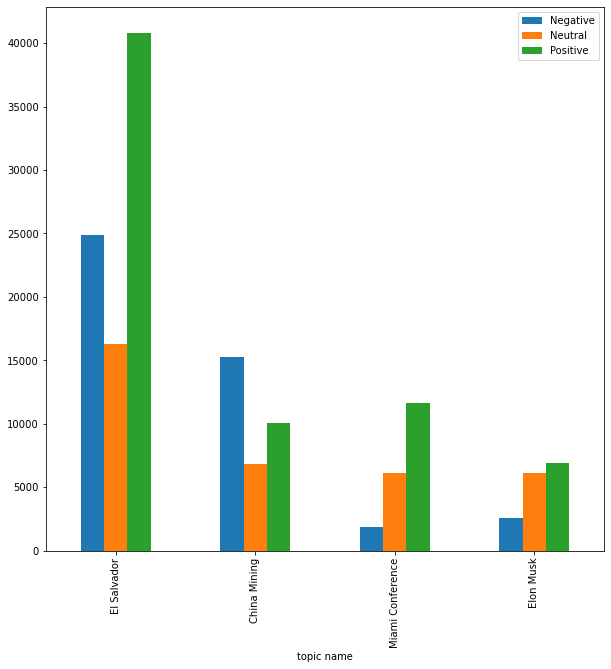

In [409]:
fig = table.plot.bar(rot=90, figsize=(10,10))
#fig.figure.savefig('sentiment_analysis.png', bbox_inches='tight')